## KNN K-nearest neighbors algorithm

KNN 是一种惰性学习模型（基于实例的学习模型）。惰性模型会对训练数据集进行少量或者完全不处理的方式。和简单线性回归这样的勤奋学习模型不同，KNN在训练阶段不会估计由模型生成的参数。惰性学习有利有弊。训练勤奋学习模型通常非常消耗计算资源，但是在模型预测阶段代价并不昂贵。但是在KNN这类惰性模型中，预测阶段往往要付出高昂的代价，在预测的过程中要求计算出每一个测试实例和所有训练实例之间的距离。

KNN也是一种非参数模型。参数模型使用固定数量的参数或者系数去定义能够对数据进行总结的模型，参数的数量独立于训练实例的数量。但是非参数模型意味着模型参数的数量并不固定，它可能随着训练实例数量的增加而增加。

当训练数据数量庞大，同时对响应变量和解释变量之间的关系所知甚少时，非参数模型会非常有用。KNN模型只基于一个假设，相互接近的实例拥有类似的响应变量值。非参数模型提供的灵活性并不总是可取的，当训练数据很缺乏或者对响应变量和解释变量之间的关系有所了解的时候，对响应变量和解释变量之间关系做出假设的模型就很有用。

利用KNN解决二元分类问题（响应变量只能从两个标签中二选一的情况为二元分类）

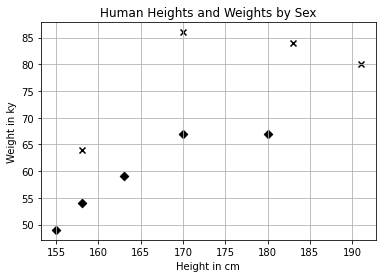

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

y_train = ["male", "male", 'male', 'male', 'female','female', 'female', 'female', 'female']

plt.figure()
plt.title("Human Heights and Weights by Sex")
plt.xlabel('Height in cm')
plt.ylabel("Weight in ky")

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c = "k", marker = "x" if y_train[i] == "male" else "D") # 这里
    
plt.grid(True)
plt.show()

In [2]:
for i, x in enumerate(X_train):
    print(i)
    print(x[0])
    break

0
158


KNN在分类问题中，如何判断给出的测试样例所属的分类呢？

由于KNN是惰性学习模型，因此在预测阶段要通过计算测试实例和所有或给定数量的训练实例之间的距离来进行预测。

在二维预测中我们通常使用高中所学的直角坐标系中两点之间的距离来进行距离的计算（即欧几里得空间中两点之间的直线距离）。

In [3]:
x = np.array([[155, 70]])
# axis = 0 的时候，np.sum()方法实际上是让每一列的数据进行相加，axis = 1的时候实际上是每一行的数据进行相加。
# 行不变，不同列之间相加（axis = 1）
# 列不变，不同行之间相加（axis = 0）
distances = np.sqrt(np.sum((X_train - x) **2, axis = 1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [41]:
# argsort函数返回的是数组值从小到大的索引值
nearest_neighbor_indices = distances.argsort()[:3]
# print(list(nearest_neighbor_indices))
# print(distances.argsort())
# print(y_train)
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

nearest_neighbor_genders = np.array(y_train)[list(nearest_neighbor_indices)]

nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)

上面这两行的功能是一样的，第一行用了np.array的"fancy"索引，第二行用了np.take()的用法

In [46]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
print(b)
print(b.most_common(1))
print(b.most_common(1)[0])
b.most_common(1)[0][0]

Counter({'female': 2, 'male': 1})
[('female', 2)]
('female', 2)


'female'

In [48]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [50]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train)
y_train_binarized

['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']


array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [68]:
y_train_binarized.reshape(-1)

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [62]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [170,  67]])

In [63]:
K = 3
clf = KNeighborsClassifier(n_neighbors = K)
clf.fit(X_train, y_train_binarized.reshape(-1))

KNeighborsClassifier(n_neighbors=3)

In [71]:
np.array([155, 70]).reshape( -1)

array([155,  70])

In [74]:
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1,-1))[0]

In [75]:
prediction_binarized

0

In [76]:
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

In [87]:
X_test = np.array([
    [168,65],
    [180,96],
    [160,52],
    [169,67]
])

y_test = ["male", "male", 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: {0}'.format(y_test_binarized.T[0]))

Binarized labels: [1 1 0 0]


In [88]:
predictions_binarized = clf.predict(X_test)
print("Binarized prediction: {}".format(predictions_binarized))

Binarized prediction: [0 1 0 0]


In [89]:
print('Predicted label {}'.format(lb.inverse_transform(predictions_binarized)))

Predicted label ['female' 'male' 'female' 'female']


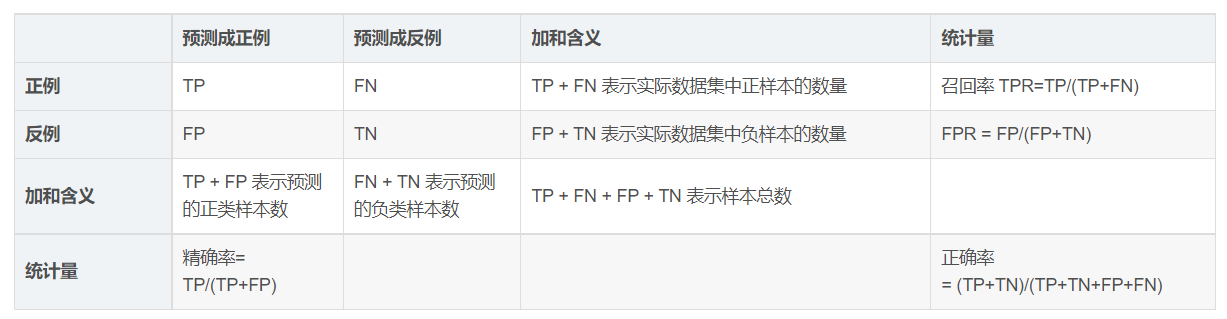
TP（True Positive）: 实际为正类，预测为正类

TN（True Negative）: 实际为正类，预测为负类

FP（False Positive）: 实际为负类，预测为正类

FN（False Negative）: 实际为正类，预测为负类

准确率

In [90]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(y_test_binarized, predictions_binarized)))

Accuracy: 0.75


精确率

In [91]:
# 精确率是实际为正样本占被预测为正样本的比率
from sklearn.metrics import precision_score
print('Precision: {}'.format(precision_score(y_test_binarized, predictions_binarized)))

Precision: 1.0


召回率

In [93]:
# 召回率是真实为正向类的测试实例被预测为正向类的比率
from sklearn.metrics import recall_score
print('Recall: {}'.format(recall_score(y_test_binarized, predictions_binarized)))

Recall: 0.5


F1 score
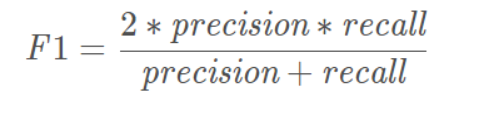

In [94]:
from sklearn.metrics import f1_score
print('F1 score: {}'.format(f1_score(y_test_binarized, predictions_binarized)))

F1 score: 0.6666666666666666


马修斯相关系数（MCC）是除F1得分以外，另一种对二元分类器性能进行衡量的选择。一个完美分类器的MCC值为1，随机进行预测的分类器MCC的得分为0， 完全预测错误的分类器MCC得分为-1。即使当测试数据集的类别比例非常不平衡时，MCC得分也非常有用。

In [95]:
from sklearn.metrics import matthews_corrcoef
print('Mattews correlation coefficient: %s' %matthews_corrcoef(y_test_binarized, predictions_binarized))

Mattews correlation coefficient: 0.5773502691896258


sklearn还提供了一个函数能够同时生成精确率、召回率和F1得分。

Macro Average

宏平均是指在计算均值时使每个类别具有相同的权重，最后结果是每个类别的指标的算术平均值。

Micro Average

微平均是指计算多分类指标时赋予所有类别的每个样本相同的权重，将所有样本合在一起计算各个指标。

如果每个类别的样本数量差不多，那么宏平均和微平均没有太大差异

如果每个类别的样本数量差异很大，那么注重样本量多的类时使用微平均，注重样本量少的类时使用宏平均

如果微平均大大低于宏平均，那么检查样本量多的类来确定指标表现差的原因

如果宏平均大大低于微平均，那么检查样本量少的类来确定指标表现差的原因


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names = ['male'], labels = [1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



In [101]:
print(classification_report(y_test_binarized, predictions_binarized, target_names = ['female'], labels = [0]))

              precision    recall  f1-score   support

      female       0.67      1.00      0.80         2

   micro avg       0.67      1.00      0.80         2
   macro avg       0.67      1.00      0.80         2
weighted avg       0.67      1.00      0.80         2



### KNN回归问题

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

在衡量回归模型性能好坏的时候我们引入两个新的指标————平均绝对误差（MAE）和均方误差（MSE）

MAE是预测结果误差绝对值之和的均值

MSE是预测结果误差平方之和的均值

对于回归模型性能衡量指标来说，忽略误差的方向非常重要，否则一个回归模型中的正负方向的误差会相互抵消。MSE和MAE分别通过对误差求平方和求绝对值的方法避免了这个问题。对于一个较大的误差值求平方会加大它对整体误差的贡献比例，因此MSE比MAE对于异常值的惩罚程度要高。该特性对于一些问题来说非常有用。由于MSE具有非常有用的数学特性，它通常是性能衡量指标当仁不让的首选

In [2]:
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])

y_test = [65, 96, 52, 67]

In [3]:
K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error %s' %mean_squared_error(y_test, predictions) )

Predicted wieghts: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error 95.8888888888889


特征缩放

In [15]:
from scipy.spatial.distance import euclidean
import numpy as np

In [23]:
# heights in millimeters
X_train = np.array([
    [1700, 1],
    [1600, 0]
])

x_test = np.array([1640, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.01249804748511


In [24]:
# heights in meters
X_train = np.array([
    [1.7, 1],
    [1.6, 0]
])
x_test = np.array([164, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

162.3
162.40307878855006


sklearn中的StandardScaler类是一个用于特征缩放的转换器，它能确保所有的特征都有单位方差（即方差 = 1）。

这个类的方法为：首先将所有实例特征值减去均值来将其居中。其次将每个实例特征值除以特征的标准差对其进行缩放。通过以上的两步处理得到的一组新的数据。这组数据中均值为0，方差为1称为标准化数据。

In [25]:
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])

y_test = [65, 96, 52, 67]

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [31]:
X_test_scaled = ss.fit_transform(X_test)
K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted wieghts: %s' %predictions)
print('Coefficient of determination: %s' %r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' %mean_squared_error(y_test, predictions))

Predicted wieghts: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
